In [1]:
import os
import ast
from tqdm import tqdm
from datasets import load_dataset

In [2]:
ds = load_dataset("nvidia/Nemotron-PII")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['uid', 'domain', 'document_type', 'document_description', 'document_format', 'locale', 'text', 'spans', 'text_tagged'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['uid', 'domain', 'document_type', 'document_description', 'document_format', 'locale', 'text', 'spans', 'text_tagged'],
        num_rows: 100000
    })
})

In [4]:
ds['test']

Dataset({
    features: ['uid', 'domain', 'document_type', 'document_description', 'document_format', 'locale', 'text', 'spans', 'text_tagged'],
    num_rows: 100000
})

In [5]:
ds['test'][0]

{'uid': 'ebd01589fd75420da79eea362ce54e2c',
 'domain': 'Life',
 'document_type': 'visa application (e.g., F-1, H-1B)',
 'document_description': 'A life and visa application document, such as an F-1 or H-1B form, is typically an unstructured PDF or printable word document with common fields including personal information (name, date of birth, address), passport details, educational background, employment history, financial information, and supporting documents like transcripts, letters of recommendation, and proof of funds, all requiring manual filling and submission.',
 'document_format': 'unstructured',
 'locale': 'us',
 'text': 'Brian, born on 1963-08-08, resides at 146 County Rd 86 in Knox County, USA.  As part of the visa application process, he will need to provide his bank routing number, 271210785 and credit debit card, 5490 3479 1287 6543, to demonstrate financial stability.',
 'spans': "[{'start': 0, 'end': 5, 'text': 'Brian', 'label': 'first_name'}, {'start': 15, 'end': 25, '

In [6]:
train_label = []
train_spans = []
train_doc_type = []

for elem in tqdm(ds['train'], total=len(ds['train'])):

    train_doc_type.append(elem['document_type'])
    
    spans = ast.literal_eval(elem['spans'])

    train_spans.append(spans)

    for span in spans:
        train_label.append(span['label'])

train_label = list(set(train_label))
train_doc_type = list(set(train_doc_type))

100%|██████████| 100000/100000 [00:15<00:00, 6337.58it/s]


In [7]:
train_label

['license_plate',
 'swift_bic',
 'county',
 'ssn',
 'biometric_identifier',
 'fax_number',
 'unique_id',
 'ipv4',
 'company_name',
 'state',
 'customer_id',
 'bank_routing_number',
 'street_address',
 'occupation',
 'education_level',
 'gender',
 'date_time',
 'account_number',
 'certificate_license_number',
 'age',
 'religious_belief',
 'race_ethnicity',
 'postcode',
 'tax_id',
 'health_plan_beneficiary_number',
 'employment_status',
 'country',
 'pin',
 'city',
 'device_identifier',
 'mac_address',
 'vehicle_identifier',
 'coordinate',
 'email',
 'date_of_birth',
 'url',
 'http_cookie',
 'national_id',
 'ipv6',
 'sexuality',
 'political_view',
 'language',
 'api_key',
 'credit_debit_card',
 'cvv',
 'blood_type',
 'first_name',
 'last_name',
 'date',
 'time',
 'medical_record_number',
 'phone_number',
 'user_name',
 'password',
 'employee_id']

In [8]:
len(train_label)

55

In [9]:
len(train_doc_type), train_doc_type[:10]

(1451,
 ['Safety Guidelines',
  'Lab Protocol',
  'Biometric Border Screening Document',
  'Batch Record',
  'Freight Rate List',
  'Proof of Delivery',
  'Annual Report',
  'Leasing Documentation',
  'Sponsorship Letter',
  'Audio Production Plan Outline'])

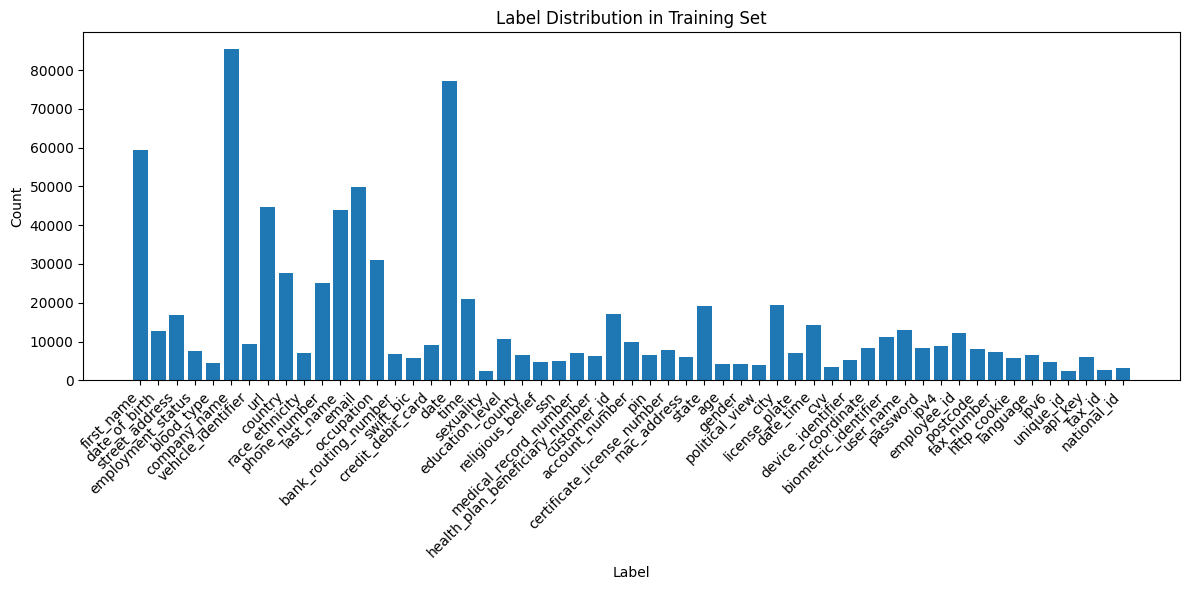

Label Distribution:
  company_name: 85441
  date: 77130
  first_name: 59391
  email: 49934
  url: 44803
  last_name: 43962
  occupation: 31105
  country: 27781
  phone_number: 25012
  time: 21054
  city: 19313
  state: 19067
  customer_id: 17211
  street_address: 16830
  date_time: 14368
  user_name: 12872
  date_of_birth: 12710
  employee_id: 12067
  biometric_identifier: 11188
  education_level: 10633
  account_number: 9998
  vehicle_identifier: 9339
  credit_debit_card: 9049
  ipv4: 8954
  coordinate: 8438
  password: 8285
  postcode: 8030
  certificate_license_number: 7920
  employment_status: 7654
  fax_number: 7357
  license_plate: 7134
  race_ethnicity: 7130
  medical_record_number: 7095
  bank_routing_number: 6759
  pin: 6548
  language: 6531
  county: 6462
  health_plan_beneficiary_number: 6345
  mac_address: 6096
  api_key: 6086
  swift_bic: 5821
  http_cookie: 5786
  device_identifier: 5255
  ssn: 4937
  ipv6: 4794
  religious_belief: 4740
  blood_type: 4517
  gender: 4304
 

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

# Collect all labels from training set
all_train_labels = []
for elem in ds['train']:
    spans = ast.literal_eval(elem['spans'])
    for span in spans:
        all_train_labels.append(span['label'])

# Calculate label distribution
label_counts = Counter(all_train_labels)
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Plot label distribution
plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in Training Set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Label Distribution:")
for label, count in sorted(label_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {label}: {count}")

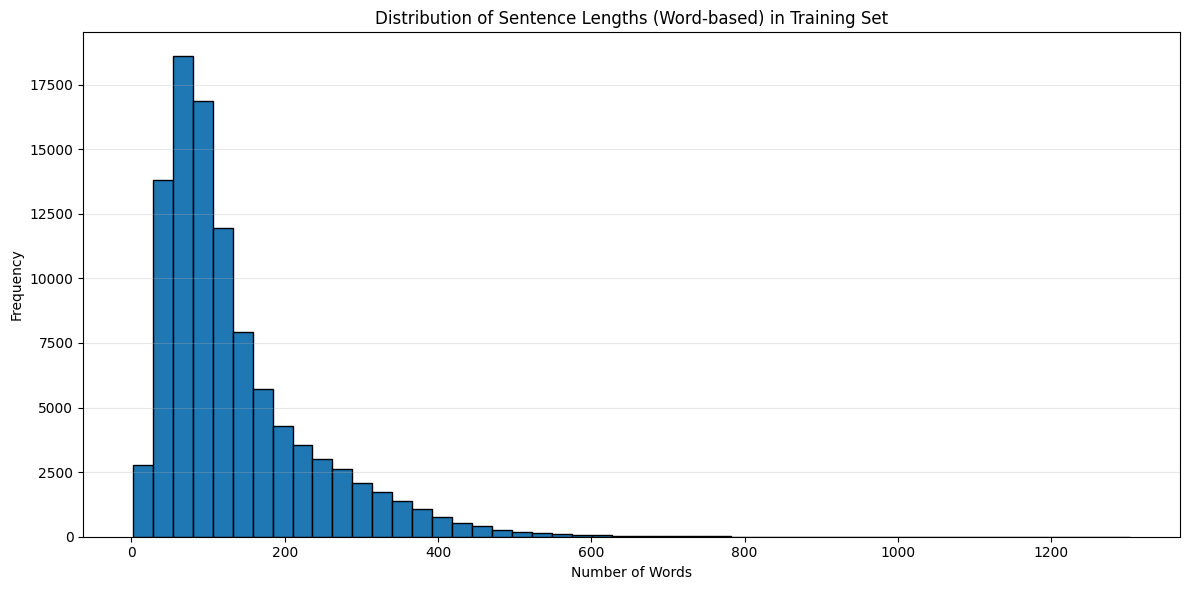

Sentence Length Statistics (word-based):
  Min: 2
  Max: 1303
  Mean: 134.53
  Total sentences: 100000


In [11]:
# Calculate sentence lengths (word-based split) for training set
sentence_lengths = []

for elem in ds['train']:
    text = elem['text']
    # Split by whitespace to get words
    words = text.split()
    sentence_lengths.append(len(words))

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths (Word-based) in Training Set')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print(f"Sentence Length Statistics (word-based):")
print(f"  Min: {min(sentence_lengths)}")
print(f"  Max: {max(sentence_lengths)}")
print(f"  Mean: {sum(sentence_lengths) / len(sentence_lengths):.2f}")
print(f"  Total sentences: {len(sentence_lengths)}")

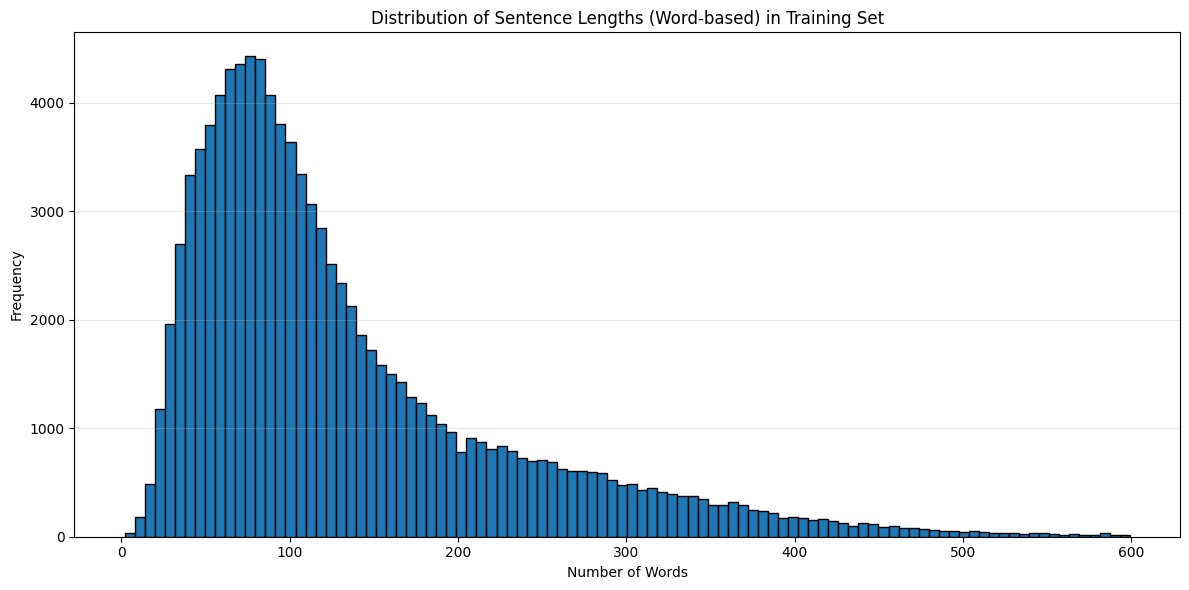

Sentence Length Statistics (word-based):
  Min: 2
  Max: 599
  Mean: 133.50
  Total sentences: 99821


In [12]:
# Filter sentence lengths less than 600
sentence_lengths_modified = [length for length in sentence_lengths if length < 600]

# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(sentence_lengths_modified, bins=100, edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths (Word-based) in Training Set')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print(f"Sentence Length Statistics (word-based):")
print(f"  Min: {min(sentence_lengths_modified)}")
print(f"  Max: {max(sentence_lengths_modified)}")
print(f"  Mean: {sum(sentence_lengths_modified) / len(sentence_lengths_modified):.2f}")
print(f"  Total sentences: {len(sentence_lengths_modified)}")

In [21]:
elem['document_format']

'structured'

In [22]:
import ast

samples_with_multiple_first_names = []

for idx, elem in enumerate(ds['train']):
    spans = ast.literal_eval(elem['spans'])
    doc_type = ast.literal_eval(elem['document_type'])
    # collect first_name span texts (preserve order)
    first_names = [s['text'].strip() for s in spans if s.get('label') == 'first_name']
    unique_first_names = list(dict.fromkeys(first_names))
    if (len(unique_first_names) >= 2) and (elem['document_format'] == "unstructured"):
        samples_with_multiple_first_names.append({
            'index': idx,
            'text_preview': elem.get('text', ''),
            'first_names': unique_first_names,
            'all_spans': spans
        })

        if len(samples_with_multiple_first_names) == 2:
            break
    
    

print(f"Found {len(samples_with_multiple_first_names)} samples with >=2 distinct 'first_name' spans\n")

# Print up to 20 examples
for sample in samples_with_multiple_first_names[:20]:
    print(f"Index: {sample['index']}")
    print(f"First names: {sample['first_names']}")
    print(f"Text preview: {sample['text_preview']}\n")
    print('-'*80)

# Save indices for easy access
indices_with_multiple_first_names = [s['index'] for s in samples_with_multiple_first_names]

SyntaxError: invalid syntax (<unknown>, line 1)